### データの用意

In [1]:
!git clone https://github.com/oshimamasara/ABC-Handwriting-AI-Checker-App.git

Cloning into 'ABC-Handwriting-AI-Checker-App'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 81504 (delta 0), reused 2 (delta 0), pack-reused 81500
Receiving objects: 100% (81504/81504), 122.40 MiB | 33.42 MiB/s, done.
Resolving deltas: 100% (18/18), done.
Checking out files: 100% (81475/81475), done.


In [2]:
%cd ABC-Handwriting-AI-Checker-App/

/content/ABC-Handwriting-AI-Checker-App


In [3]:
!ls

ABC_data.zip  check-train.csv	get-dataset.ipynb  train
checkCSV      datasetCSV.ipynb	README.md	   train.csv


In [4]:
!find train -type f | wc -l

81463


In [5]:
file = open("train.csv")
numline = len(file.readlines())
print (numline)

81463


In [6]:
!ls train | head -5

41_00000_0.png
41_00000_1.png
41_00000_2.png
41_00000_3.png
41_00000_4.png


In [7]:
!sed -n 1,5p train.csv

41_00000_0,0
41_00000_1,0
41_00000_2,0
41_00000_3,0
41_00000_4,0


### csv データ　シャッフル

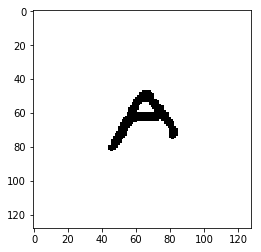

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


A  = "train/41_00000_4.png"
img = Image.open(A)
plt.imshow(img)

### ラーニングセット

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

Using TensorFlow backend.


In [0]:
col_Names=["id", "label"]
train = pd.read_csv("train.csv",names=col_Names)

In [11]:
train[0:5]

,id,label
0,41_00000_0,0
1,41_00000_1,0
2,41_00000_2,0
3,41_00000_3,0
4,41_00000_4,0


In [12]:
train.shape

(81463, 2)

In [13]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('train/'+train['id'][i]+'.png', target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

  0%|          | 0/81463 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 81463/81463 [00:44<00:00, 1834.64it/s]


In [0]:
y=train['label'].values
y = to_categorical(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [16]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

65170
16293
65170
16293


In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(26, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [19]:
fit = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 65170 samples, validate on 16293 samples
Epoch 1/20





65170/65170 [==============================] - 32s 489us/step - loss: 0.9525 - acc: 0.7151 - val_loss: 0.2979 - val_acc: 0.9155
Epoch 2/20
65170/65170 [==============================] - 24s 368us/step - loss: 0.4574 - acc: 0.8628 - val_loss: 0.2390 - val_acc: 0.9322
Epoch 3/20
65170/65170 [==============================] - 23s 359us/step - loss: 0.3785 - acc: 0.8879 - val_loss: 0.2058 - val_acc: 0.9406
Epoch 4/20
65170/65170 [==============================] - 24s 365us/step - loss: 0.3272 - acc: 0.9030 - val_loss: 0.1938 - val_acc: 0.9456
Epoch 5/20
65170/65170 [==============================] - 24s 363us/step - loss: 0.2950 - acc: 0.9114 - val_loss: 0.1824 - val_acc: 0.9485
Epoch 6/20
65170/65170 [==============================] - 24s 369us/step - loss: 0.2738 - acc: 0.9170 - val_loss: 0.1804 - val_acc: 0.9472
Epoch 7/20
651

### ラーニング結果の検証

In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print("ロス　" + str(score[0]))
print("精度　" + str(score[1]))

ロス　0.17722893858043143
精度　0.9566071318971338


In [0]:
model.save('ABCmodel.h5') 

In [22]:
fit.history

{'acc': [0.7151296608795943,
  0.8627742826380722,
  0.8878778579100813,
  0.9029768298223594,
  0.9114162958453034,
  0.9170016878932024,
  0.9230013810053584,
  0.9261776891134442,
  0.9304281110940616,
  0.9322234156820624,
  0.9346324996090711,
  0.9369648611324229,
  0.939880313021979,
  0.9396808347417402,
  0.9406628816976894,
  0.9428111094061685,
  0.9447138253816052,
  0.9443455577646641,
  0.9460181064907166,
  0.9470461868884942],
 'loss': [0.9525473954012849,
  0.4573798496682567,
  0.3785082517362398,
  0.32717323181854907,
  0.2950023339504257,
  0.27376151091050605,
  0.25804728352531475,
  0.24329509778070874,
  0.2281408012443769,
  0.2186750145124588,
  0.2117101041162528,
  0.20409653925339613,
  0.19717447940767205,
  0.19202969178491086,
  0.18727513778213345,
  0.18180505954208176,
  0.17809420413760224,
  0.17567962375803192,
  0.16864308608395476,
  0.16666086240516806],
 'val_acc': [0.9154851776836679,
  0.9321794635733137,
  0.9405879825692015,
  0.9456208187

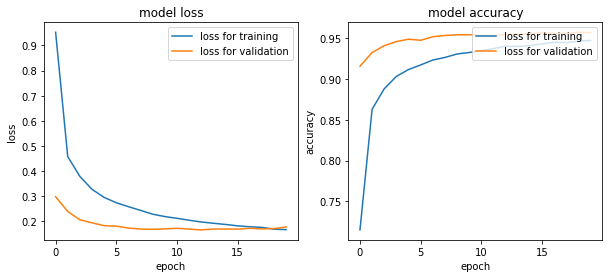

In [24]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
def plot_history_loss(hist):
    # Plot the loss in the history
    axL.plot(fit.history['loss'],label="loss for training")
    axL.plot(fit.history['val_loss'],label="loss for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

# acc
def plot_history_acc(hist):
    # Plot the loss in the history
    axR.plot(fit.history['acc'],label="loss for training")
    axR.plot(fit.history['val_acc'],label="loss for validation")
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='upper right')

plot_history_loss(fit)
plot_history_acc(fit)

### 自分の画像でテスト

In [30]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img
test_model = load_model('ABCmodel.h5')
img = load_img('test_img/Y.png',target_size=(28,28,1), grayscale=True)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = test_model.predict_classes(x)
prob = test_model.predict_proba(x)
print(preds)
print(prob)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


[24]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0.]]


### h5 -> tflite Convert

In [32]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model_file('ABCmodel.h5')
tflite_model = converter.convert()
open('ABC.tflite', 'wb').write(tflite_model)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.


4809820